# 1.2.2 图像轮廓和直方图

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im=np.array(Image.open('../data/empire.jpg').convert('L'))

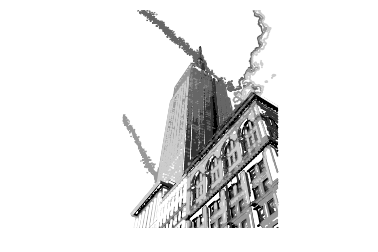

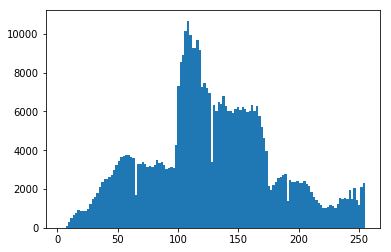

In [3]:
plt.figure()
plt.gray()
plt.contour(im,origin='image')
plt.axis('equal')
plt.axis('off')
plt.figure()
plt.hist(im.flatten(),128)
plt.show()

# 1.3.2 灰度变换

In [4]:
im2=255-im
im3=(100.0/255)*im+100
im4=255.0*(im/255.0)**2

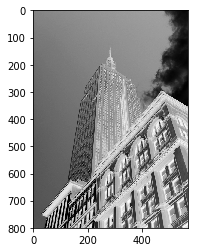

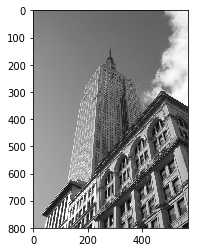

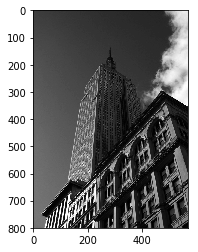

In [5]:
plt.figure()
plt.imshow(im2)
plt.figure()
plt.imshow(im3)
plt.figure()
plt.imshow(im4)
plt.show()

In [6]:
im.dtype

dtype('uint8')

# 1.3.4 直方图均衡化

In [7]:
imhist,bins=np.histogram(im.flatten(),256)

In [8]:
imhist

array([   2,    3,    3,   10,   35,   76,  126,  158,  247,  272,  322,
        362,  400,  383,  483,  438,  434,  409,  437,  409,  430,  453,
        439,  527,  563,  654,  726,  740,  786,  825,  840,  961,  998,
       1116, 1173, 1164, 1257, 1259, 1277, 1219, 1256, 1346, 1358, 1387,
       1527, 1477, 1593, 1672, 1752, 1692, 1859, 1775, 1843, 1858, 1911,
       1857, 1860, 1886, 1868, 1787, 1814, 1794, 1680,    0, 1644, 1640,
       1576, 1692, 1677, 1703, 1735, 1580, 1614, 1548, 1550, 1623, 1517,
       1611, 1621, 1614, 1744, 1743, 1703, 1635, 1719, 1660, 1682, 1541,
       1541, 1488, 1529, 1531, 1639, 1522, 1563, 1547, 1834, 2454, 3351,
       3964, 4281, 4265, 4422, 4498, 4886, 5262, 5400, 5282, 5145, 4815,
       4746, 4539, 4674, 4618, 4862, 4845, 4855, 4297, 3756, 3501, 3642,
       3842, 3582, 3651, 3548, 3418, 3393,    0, 3227, 3102, 2959, 3057,
       3270, 3199, 3162, 3231, 3333, 3481, 3296, 2965, 2964, 3043, 3061,
       2976, 2876, 3049, 3168, 2945, 3112, 3119, 29

In [9]:
bins

array([  3.      ,   3.984375,   4.96875 ,   5.953125,   6.9375  ,
         7.921875,   8.90625 ,   9.890625,  10.875   ,  11.859375,
        12.84375 ,  13.828125,  14.8125  ,  15.796875,  16.78125 ,
        17.765625,  18.75    ,  19.734375,  20.71875 ,  21.703125,
        22.6875  ,  23.671875,  24.65625 ,  25.640625,  26.625   ,
        27.609375,  28.59375 ,  29.578125,  30.5625  ,  31.546875,
        32.53125 ,  33.515625,  34.5     ,  35.484375,  36.46875 ,
        37.453125,  38.4375  ,  39.421875,  40.40625 ,  41.390625,
        42.375   ,  43.359375,  44.34375 ,  45.328125,  46.3125  ,
        47.296875,  48.28125 ,  49.265625,  50.25    ,  51.234375,
        52.21875 ,  53.203125,  54.1875  ,  55.171875,  56.15625 ,
        57.140625,  58.125   ,  59.109375,  60.09375 ,  61.078125,
        62.0625  ,  63.046875,  64.03125 ,  65.015625,  66.      ,
        66.984375,  67.96875 ,  68.953125,  69.9375  ,  70.921875,
        71.90625 ,  72.890625,  73.875   ,  74.859375,  75.843

In [10]:
imhist.shape,bins.shape

((256,), (257,))

In [11]:
np.sum(imhist),im.shape[0]*im.shape[1]

(455200, 455200)

In [12]:
help(np.interp)

Help on function interp in module numpy.lib.function_base:

interp(x, xp, fp, left=None, right=None, period=None)
    One-dimensional linear interpolation.
    
    Returns the one-dimensional piecewise linear interpolant to a function
    with given values at discrete data-points.
    
    Parameters
    ----------
    x : array_like
        The x-coordinates of the interpolated values.
    
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points, same length as `xp`.
    
    left : optional float or complex corresponding to fp
        Value to return for `x < xp[0]`, default is `fp[0]`.
    
    right : optional float or complex corresponding to fp
        Value to return for `x > xp[-1]`, defa

In [13]:
def hist_norm(img):
    imhist,bins=np.histogram(img.flatten(),256)
    cdf=np.cumsum(imhist)
    cdf=255*cdf/cdf[-1]
    img2=np.interp(img.flatten(),bins[:-1],cdf)
    return img2.reshape(img.shape),cdf

In [14]:
img2,cdf=hist_norm(im)

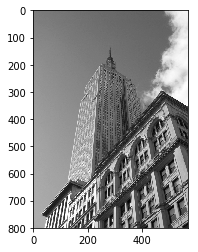

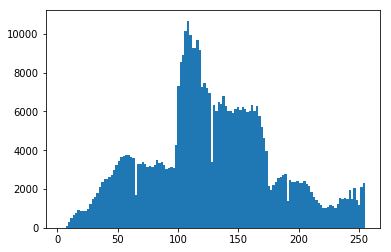

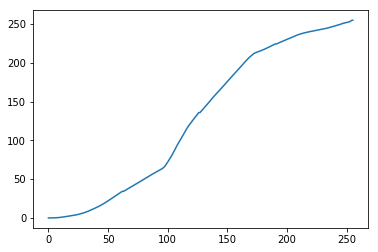

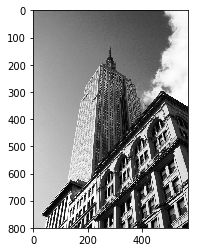

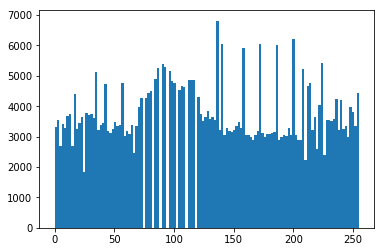

In [15]:
plt.figure()
plt.imshow(im)
plt.figure()
plt.hist(im.flatten(),128)
plt.figure()
plt.plot(cdf)
plt.figure()
plt.imshow(img2)
plt.figure()
plt.hist(img2.flatten(),128)

plt.show()

In [16]:
im=np.array(Image.open('../data/AquaTermi_lowcontrast.JPG').convert('L'))

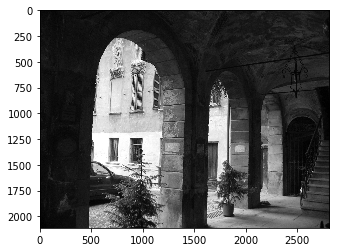

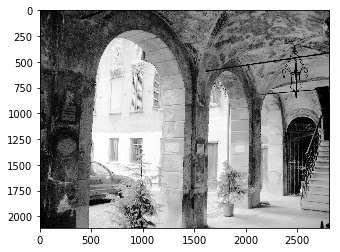

In [17]:
im2,cdf=hist_norm(im)
plt.figure()
plt.imshow(im)
plt.figure()
plt.imshow(im2)
plt.show()

# 1.3.6 PCA

In [18]:
import os
from glob import glob
img_list=glob('../data/fontimages/a_thumbs/*.jpg')

In [19]:
img_list=[ _.replace('\\','/') for _ in img_list]

$\mathbf{X}\in \mathbb{R}^{d\times n}$

$\arg\min_{\mathbf{W}} tr(\mathbf{W}^T\mathbf{XX}^T\mathbf{W}) ~~s.t.~~\mathbf{W}^T\mathbf{W}=\mathbf{I}$

$\mathcal{L}=tr(\mathbf{W}^T\mathbf{XX}^T\mathbf{W})-tr({\Lambda}\mathbf{W}^T\mathbf{W}+d\Lambda )$

$\frac{d\mathcal{L}}{d\mathbf{W}}=2\mathbf{XX}^T\mathbf{W}-2\mathbf{W}\Lambda$

$\mathbf{X}=\mathbf{USV}$

$\mathbf{XX}^T=\mathbf{USS}^T\mathbf{U}^T$

$\mathbf{W} \equiv \mathbf{U}$

$\mathbf{X}^T=\mathbf{V}^T\mathbf{S}^T\mathbf{U}^T$

为什么可以采用紧致技巧:

对$\mathbf{X}^T\mathbf{X}$进行特征值分解,求出的特征向量相当于$\mathbf{V}$,
对应求出的特征值为$\mathbf{SS}^T$,目标是求出$\mathbf{W}=\mathbf{U}=\mathbf{S}^{-1}\mathbf{VX}^T$

In [20]:
x=np.array([[1,2],[3,4]])
t=np.linalg.svd(x)
s=slice(1,2)
# print(t[0][:,0:1]@t[2][0:1,:] )
# print(t[0]@t[2][:,0:1].T)
print(t[0][:,s],t[2][s,:])

print('############################')
t=np.linalg.svd(x.T)
# print(t[0][:,0:1]@t[2][0:1,:])
# print(t[0][:,0:1]@t[2][:,0:1].T)
print(t[0][:,s],t[2][s,:])


[[-0.9145143 ]
 [ 0.40455358]] [[ 0.81741556 -0.57604844]]
############################
[[-0.81741556]
 [ 0.57604844]] [[ 0.9145143  -0.40455358]]


奇异值分解不是唯一的....？

In [21]:
def pca(x,td):
    """
    Args:
        x (np.ndarry(float)[d,n]): d is the data's dimension, n is the number of data
        td (int): number of the directions
    Return:
        w (np.ndarry(float) [d,td]): principle components
    """
    d,n=x.shape
    xm=x.mean(axis=1)#[d]
    x=x-xm[:,None] 
    
    if n<d:
        # compact trick
        conv_x=x.T @ x
        e,ev=np.linalg.eig(conv_x)
        e=np.sqrt(e)
        w=(ev@x.T)/e[:,None]
        w=w[:,::-1][:,:td]
    else:
        U,S,V=np.linalg.svd(x)
        w=U[:,:td]
    
    return w

In [22]:
print(img_list)

['../data/fontimages/a_thumbs/907_t.jpg', '../data/fontimages/a_thumbs/451_t.jpg', '../data/fontimages/a_thumbs/2248_t.jpg', '../data/fontimages/a_thumbs/1111_t.jpg', '../data/fontimages/a_thumbs/1106_t.jpg', '../data/fontimages/a_thumbs/1224_t.jpg', '../data/fontimages/a_thumbs/1946_t.jpg', '../data/fontimages/a_thumbs/1715_t.jpg', '../data/fontimages/a_thumbs/401_t.jpg', '../data/fontimages/a_thumbs/159_t.jpg', '../data/fontimages/a_thumbs/653_t.jpg', '../data/fontimages/a_thumbs/1784_t.jpg', '../data/fontimages/a_thumbs/205_t.jpg', '../data/fontimages/a_thumbs/478_t.jpg', '../data/fontimages/a_thumbs/2134_t.jpg', '../data/fontimages/a_thumbs/1987_t.jpg', '../data/fontimages/a_thumbs/1629_t.jpg', '../data/fontimages/a_thumbs/2082_t.jpg', '../data/fontimages/a_thumbs/530_t.jpg', '../data/fontimages/a_thumbs/131_t.jpg', '../data/fontimages/a_thumbs/2351_t.jpg', '../data/fontimages/a_thumbs/1309_t.jpg', '../data/fontimages/a_thumbs/1749_t.jpg', '../data/fontimages/a_thumbs/1713_t.jpg', 

In [23]:
imgs=np.array([np.array(Image.open(_).convert('L')) for _ in img_list])

In [24]:
imgs.shape

(2359, 25, 25)

In [25]:
n,d1,d2=imgs.shape
imgs=imgs.reshape(n,-1).T

In [26]:
w=pca(imgs,7)

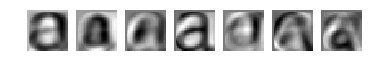

In [27]:
for i in range(1,8):
    plt.subplot(1,7,i)
    plt.imshow(w[:,i-1].reshape(d1,d2))
#     plt.axis('equal')
    plt.axis('off')
plt.show()

different from the author...

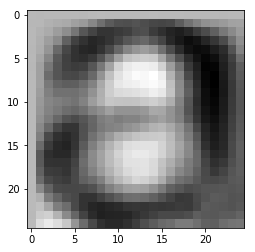

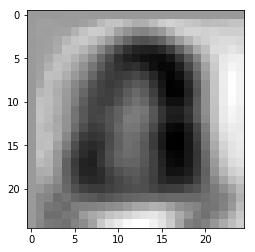

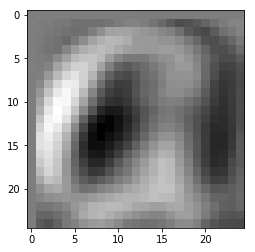

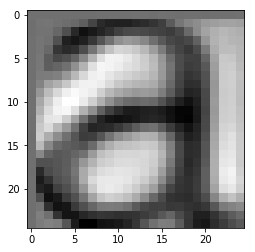

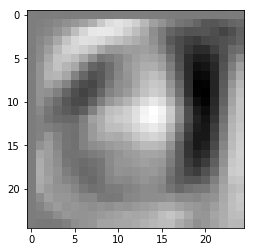

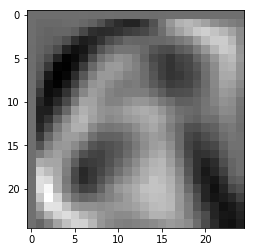

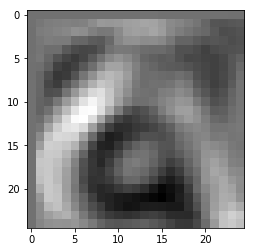

In [28]:
# plt.colormaps()
for i in range(7):
    plt.figure()
    plt.imshow(w[:,i].reshape(d1,d2) )
plt.show()

# 1.4.1 图像模糊

In [29]:
from scipy.ndimage import filters

In [30]:
im=Image.open('../data/empire.jpg').convert('L')

In [31]:
im2=filters.gaussian_filter(im,5)

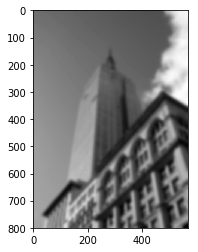

In [32]:
plt.imshow(im2)
plt.show()

# 1.4.2 图像导数

Prewitt滤波器:
$$
D_x=
\left[
    \begin{array}{ccc}
        -1 & 0 & 1 \\
        -1 & 0 & 1 \\
        -1 & 0 & 1
    \end{array}
\right],
D_y=
\left[
    \begin{array}{ccc}
        -1 & -1 & -1 \\
        0  & 0  & 0 \\
        1  & 1  & 1
    \end{array}
\right]
$$

Sobel filters:
$$
D_x=
\left[
    \begin{array}{ccc}
        -1 & 0 & 1 \\
        -2 & 0 & 2 \\
        -1 & 0 & 1
    \end{array}
\right],
D_y=
\left[
    \begin{array}{ccc}
        -1 & -2 & -1 \\
        0  & 0  & 0 \\
        1  & 2  & 1
    \end{array}
\right]
$$

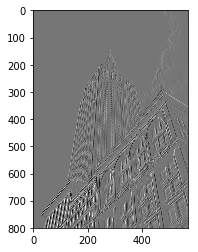

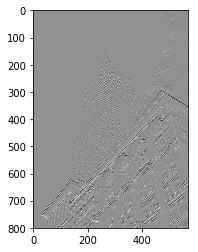

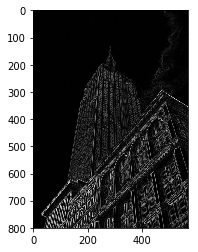

In [33]:
im=np.array(im)
imx=np.zeros(im.shape)
imy=np.zeros(im.shape)
filters.sobel(im,1,imx)
filters.sobel(im,0,imy)
immag=np.sqrt(imx**2+imy**2)
plt.figure()
plt.imshow(imx)
plt.figure()
plt.imshow(imy)
plt.figure()
plt.imshow(immag)
plt.show()

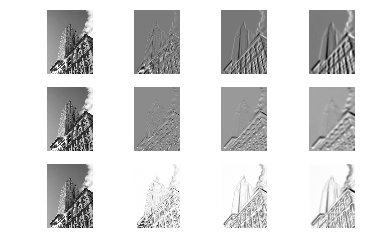

In [34]:
# guassian
for i in range(4):
    if i==0:
        for j in range(3):
            plt.subplot(3,4,j*4+i+1 )
            plt.imshow(im)
            plt.axis('equal')
            plt.axis('off')
    else:
        sigma=[0,2,5,10][i]
        imx=np.zeros(im.shape)
        imy=np.zeros(im.shape)
        filters.gaussian_filter(im,(sigma,sigma),(0,1),imx)
        filters.gaussian_filter(im,(sigma,sigma),(1,0),imy)
        immagnitude=np.sqrt(imx**2+imy**2)
        for j,m in enumerate([imx,imy,1-immagnitude]):
            plt.subplot(3,4,j*4+i+1)
            plt.imshow(m)
            plt.axis('equal')
            plt.axis('off')

plt.show()

# 1.4.3 形态学：对象计数

In [35]:
from scipy.ndimage import measurements,morphology

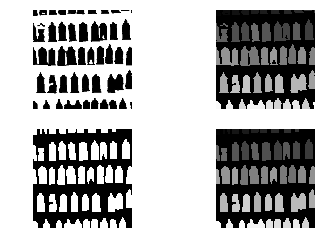

In [36]:
im=np.array(Image.open('../data/houses.png').convert('L'))
plt.subplot(2,2,1)
plt.imshow(im)
plt.axis('off')
plt.subplot(2,2,2)
im=1*(im<128)
labels,num_objects =measurements.label(im)
# print(im)
plt.imshow(labels)
plt.axis('off')
im_open=morphology.binary_opening(im,np.ones((9,5) ),iterations=2)
plt.subplot(2,2,3)
plt.imshow(im_open)
plt.axis('off')
labels,num_objects=measurements.label(im_open)
plt.subplot(2,2,4)
plt.imshow(labels)
plt.axis('off')
plt.show()


# 1.5 ROF

In [37]:
def denoise(im,U_init,tolerence=.1,tau=.125,tv_weight=100):
    w,h=im.shape
    U=U_init
    Px=im
    Py=im
    error=1
    
    while (error>tolerence):
        Uold=U
        
        GradUx=np.roll(U,-1,axis=1)-U
        GradUy=np.roll(U,-1,axis=0)-U
        
        PxNew= Px+(tau/tv_weight)*GradUx
        PyNew= Py+(tau/tv_weight)*GradUy
        NormNew=np.maximum(np.sqrt(PxNew**2+PyNew**2),1)
        
        Px=PxNew/NormNew
        Py=PyNew/NormNew
        
        RxPx=np.roll(Px,1,axis=1)
        RyPy=np.roll(Py,1,axis=0)
        
        DivP=(Px-RxPx)+(Py-RyPy)
        U=im+tv_weight*DivP
        
        error=np.linalg.norm(U-Uold)/np.sqrt(w*h)
        
    return U,im-U

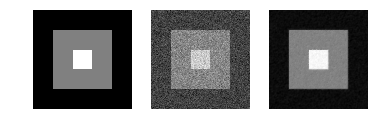

In [38]:
im=np.zeros((500,500))
im[100:400,100:400]=128
im[200:300,200:300]=255
im_noise=im+30*np.random.normal(0,1,im.shape )
U,T=denoise(im_noise,im_noise)
for i,m in enumerate([im,im_noise,U]):
    plt.subplot(1,3,i+1)
    plt.imshow(m)
    plt.axis('off')
plt.show()

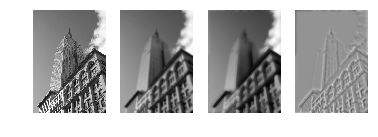

In [39]:
im=np.array(Image.open('../data/empire.jpg').convert('L'))
im_noise=filters.gaussian_filter(im,5) # this can not work...
# im_noise=im+30*np.random.normal(0,1,im.shape )
U,T=denoise(im_noise,im_noise,1e-2)
for i,m in enumerate([im,im_noise,U,T]):
    plt.subplot(1,4,i+1)
    plt.imshow(m)
    plt.axis('off')
plt.show()

嗯 所以说去燥算法怎么可以用来作deblur呢。。。

# 练习

## (1) 高斯图像的轮廓

In [40]:
from scipy.ndimage import filters

In [41]:
im=np.array(Image.open('../data/empire.jpg').convert('L'))

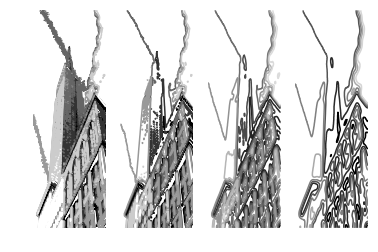

In [42]:
for i in range(4):
    if i==0:
        im_noise=im
    else:
        im_noise=filters.gaussian_filter(im,[2,5,10][i-1])
    plt.subplot(1,4,i+1)
    plt.contour(im_noise,origin='image')
    plt.axis('off')
plt.show()

方差越大，丢失的信息越多，导致最后只剩下方差最大的轮廓线。

## (2) 反锐化眼膜 (unsharp mask)
image=image+(image-blur)*scale

In [157]:
im=np.array(Image.open('../data/eye.jpg') )
# im_mean=im.reshape(-1,3).mean(axis=0)
# im_std=im.reshape(-1,3).std(axis=0)
# im=(im-im_mean)/im_std.astype('uint8')
# im_n=(im-im_mean[None,None])/im_std[None,None]
im_blur=np.zeros(im.shape).astype('uint8') # blur's result should be float...
for i in range(3):
    im_blur[...,i]=filters.gaussian_filter(im[...,i],10)
# print(im_blur[0],im_blur[0])
im_invert_blur=im-im_blur*1. # pay attention to the range of `uint8`
im_sharp=im+im_invert_blur*1.5
# im_sharp=im_sharp*im_std[None,None]+im_mean[None,None]
# im_sharp=im_sharp+im_mean
im_sharp=im_sharp.clip(0,255).astype('uint8')
# press the light...
#im_sharp,_=hist_norm(im_sharp)
#im_sharp=im_sharp.clip(0,255).astype('uint8')

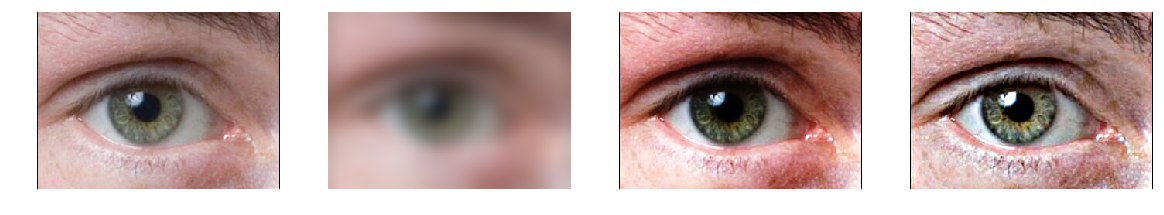

In [158]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,4,1)
plt.imshow(im)
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(im_blur.astype('uint8'))
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(hist_norm(im)[0].clip(0,255).astype('uint8'))
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(im_sharp)
plt.axis('off')
plt.show()

## (3) 商图像归一化

In [124]:
im=np.array(Image.open('../data/empire.jpg').convert('L'))

In [130]:
im_blur=filters.gaussian_filter(im,128)
im_norm=(128.0*im/(im_blur+.1)).clip(0,255).astype('uint8') # 注意取值范围，除了后，值远小于255

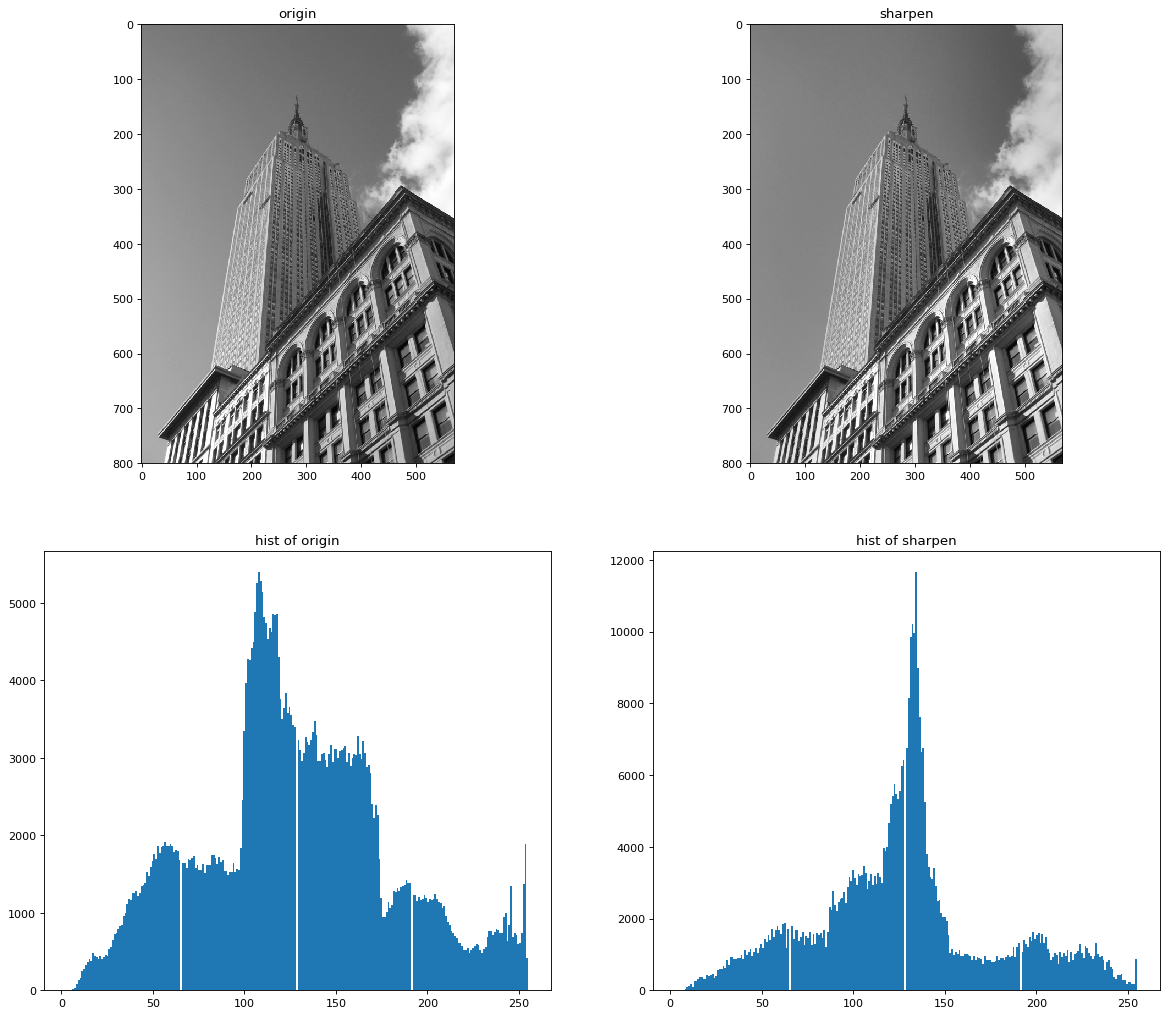

In [131]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('origin')
plt.imshow(im)
# plt.subplot(2,4,2)
# plt.hist(im)
plt.subplot(2,2,2)
plt.title('sharpen')
plt.imshow(im_norm)
# plt.subplot(1,4,4)
plt.subplot(2,2,3)
plt.title('hist of origin')
plt.hist(im.flatten(),256)
plt.subplot(2,2,4)
plt.title('hist of sharpen')
plt.hist(im_norm.flatten(),256)
plt.show()

抽油烟机

## (4) 简单物体轮廓

In [148]:
# generate cube
bg=np.full((200,200),0)
bg[50:150,50:150]=128
bg[55:145,55:145]=256

In [164]:
imdx=np.zeros(bg.shape)
imdy=imdx.copy()
filters.sobel(bg,0,imdy)
filters.sobel(bg,1,imdx)
imdx=np.abs(imdx)
imdy=np.abs(imdy)
immagnitude=np.sqrt(imdx**2+imdy**2)

# binary
immagnitude[immagnitude<1]=0
immagnitude[immagnitude>=1]=1

# print(immagnitude.max(),immagnitude.min())
# mask=1*(fusion>0)

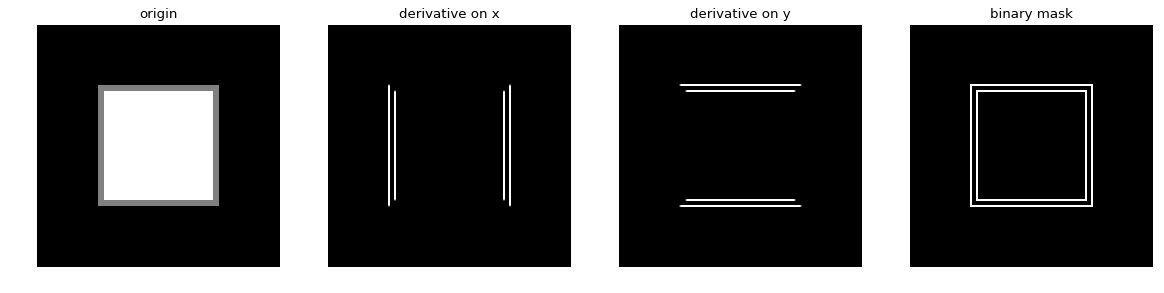

In [166]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
obj_num=4
plt.subplot(1,obj_num,1)
plt.title('origin')
plt.imshow(bg)
plt.axis('off')

plt.subplot(1,obj_num,2)
plt.title('derivative on x')
plt.imshow(imdx)
plt.axis('off')
plt.subplot(1,obj_num,3)
plt.title('derivative on y')
plt.imshow(imdy)
plt.axis('off')

plt.subplot(1,obj_num,4)
plt.title('binary mask')
plt.imshow(immagnitude)
# plt.subplot(1,obj_num,5)
# plt.contour(immagnitude,origin='image')
plt.axis('off')

# plt.subplot(1,4,4)
# plt.contour(mask,origin='image')
plt.show()

weird。。。

## (5) 直线参数估计
还记得在图像里找框吗···
用到hough变换

$y=ax+b$

$\rho=x\cdot \cos\theta + y\cdot\sin \theta$

$y=-\frac{\cos\theta}{\sin\theta}x+\frac{\rho}{\sin\theta}$

$\rho^2=x^2\cos^2\theta+y^2\sin^2\theta+xy\sin2\theta$

$\rho^2=x^2+(y^2-x^2)\sin^2\theta+xy\sin2\theta$

for every 2 points (x1,y1,x2,y2):

$
\left\{ 
\begin{array}{c}
\rho=x_1\cdot\cos\theta+y_1\cdot\sin\theta
\\
\rho=x_2\cdot\cos\theta+y_2\cdot\sin\theta
\end{array}
\right.
\Rightarrow 
f(\theta)=(x_1-x_2)\cos\theta +(y_1-y_2)\sin\theta=0
$

we can use newton optimizer to get the root of the above function, then we get $\theta$

In [4]:
from scipy import optimize
from scipy.optimize import newton

In [17]:
# example
>>> f = lambda x, a: x**3 - a
>>> fder = lambda x, a: 3 * x**2
>>> x = np.random.randn(100)
>>> a = np.arange(-50, 50)
>>> vec_res = optimize.newton(f, x, fprime=fder, args=(a, ))

(10, 10, 2, 2)
(90, 2, 2)
[0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026
 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026 0.5880026] [[[  0.    0.5]
  [  1.   -1. ]]

 [[  0.    0.5]
  [  2.   

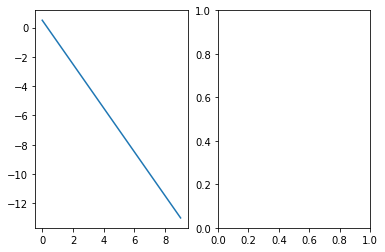

In [18]:
x=np.arange(0,10)
y=-1.5*x+.5
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.plot(x,y)

plt.subplot(1,2,2)
p=np.concatenate([x[:,None],y[:,None]],axis=1)
p1=np.tile(p[:,None,None],(1,10,1,1))
p2=np.tile(p[None,:,None],(10,1,1,1))

# print(p1.shape,p2.shape)
p=np.concatenate([p1,p2],axis=2)
print(p.shape)
pm=np.full([10,10],1).astype('bool')
pm[range(10),range(10)]=0
p=p[pm]
print(p.shape)
f=lambda theta,x:(x[:,0,0]-x[:,1,0])*np.cos(theta)+(x[:,0,1]-x[:,1,1])*np.sin(theta)
df=lambda theta,x: -(x[:,0,0]-x[:,1,0])*np.sin(theta)+(x[:,0,1]-x[:,1,1])*np.cos(theta)
# print(f(np.full(90,np.pi/2),p).shape)
# print(df(np.full(90,np.pi/2),p).shape)
# print(np.full(90,np.pi/2).shape)
roots=newton(f,np.full(90,np.pi/2),fprime=df,args=(p,))
print(roots,p)
print(p[:,0,0]*np.cos(roots)+p[:,0,1]*np.sin(roots),p)
plt.show()

In [11]:
np.array([1,2],dtype='bool').dtype==np.bool

True

In [30]:
slices=np.linspace(-np.pi/2,np.pi/2,181)
np.cos(slices)

array([6.12323400e-17, 1.74524064e-02, 3.48994967e-02, 5.23359562e-02,
       6.97564737e-02, 8.71557427e-02, 1.04528463e-01, 1.21869343e-01,
       1.39173101e-01, 1.56434465e-01, 1.73648178e-01, 1.90808995e-01,
       2.07911691e-01, 2.24951054e-01, 2.41921896e-01, 2.58819045e-01,
       2.75637356e-01, 2.92371705e-01, 3.09016994e-01, 3.25568154e-01,
       3.42020143e-01, 3.58367950e-01, 3.74606593e-01, 3.90731128e-01,
       4.06736643e-01, 4.22618262e-01, 4.38371147e-01, 4.53990500e-01,
       4.69471563e-01, 4.84809620e-01, 5.00000000e-01, 5.15038075e-01,
       5.29919264e-01, 5.44639035e-01, 5.59192903e-01, 5.73576436e-01,
       5.87785252e-01, 6.01815023e-01, 6.15661475e-01, 6.29320391e-01,
       6.42787610e-01, 6.56059029e-01, 6.69130606e-01, 6.81998360e-01,
       6.94658370e-01, 7.07106781e-01, 7.19339800e-01, 7.31353702e-01,
       7.43144825e-01, 7.54709580e-01, 7.66044443e-01, 7.77145961e-01,
       7.88010754e-01, 7.98635510e-01, 8.09016994e-01, 8.19152044e-01,
      

In [36]:
def ppht(mask,rho,theta,thresh,maxgap,minlength,max_num):
    """
    Progressive probabilistic hough transform...
    Args:
        mask    (np.ndarray(bool)[h,w,c]): binary mask for an image
        rho     (float): `\rho`
        theta   (float): `\theta`
        thresh  (int): threshold
        maxgap  (int): gap between two lines
        minlength (int): minimum length of line added into final output list.
        max_num (int): number of the lines
    Return:
        det_lines (list[(x1,y1,x2,y2),...]): the results' list
    """
    assert mask.dtype==np.bool, 'Image mask must be `bool` type'
    assert mask.ndim==2, "Mask should be one channel"
    det_lines=[]
    h,w=mask.shape
    mask=mask.copy()
    num_rho=int(((h+w)*2+1)//rho) # keep singular
    num_theta=int(180//theta)+1
    accum=np.zeros((num_rho,num_theta))
    trigtab=[ np.cos(np.linspace(-np.pi/2,np.pi/2,num_theta))/rho,
              np.sin(np.linspace(-np.pi/2,np.pi/2,num_theta))/rho 
            ] #  trigab ... rho can be considered as the scale
    # 1. get non zero points
    idx_i,idx_j=mask.nonzero()
    perm=np.random.permutation(np.arange(len(idx_i)))
    idx_i=idx_i[perm]
    idx_j=idx_j[perm]
    # 2. randomly select a point and update the accumulator
    for y,x in zip(idx_i,idx_j):
        pixel=mask[y,x]
        if not pixel:
            continue
        r=x*trigtab[0]+y*trigtab[1]
        r+=(num_rho-1)//2
        r=r.astype('int')
        accum[r,range(num_theta)]+=1
        
        # 3. get line if larger than the threshold
        this_accum=accum[r,range(num_theta)]
        max_idx=this_accum.argmax()
        if this_accum[max_idx]<thresh:
#             plt.figure(figsize=(1,100))
#             plt.imshow(accum,cmap=plt.cm.gray)
#             plt.axis('equal')
#             plt.show()
#             return None
            continue
        max_angle=max_idx
        sin_theta=-trigtab[1][max_idx]
        cos_theta=trigtab[0][max_idx]
        shift=16
        x0=x
        y0=y
        if abs(sin_theta)>abs(cos_theta):
            x_axis=True
            dx0=1 if sin_theta<0 else -1
            dy0=int(cos_theta*(1<<shift)/sin_theta)
            y0=int((y0<<shift)+(1<<(shift-1)))
        else:
            x_axis=False
            dy0=1 if sin_theta <0 else -1
            dx0=int(sin_theta*(1<<shift)/cos_theta)
            x0=int((x0<<shift)+(1<<(shift-1)))
        
        line_end=[(0,0),(0,0)]
        for k in range(2):
            gap=0
            dx,dy=dx0,dy0
            if k>0:
                dx*=-1
                dy*=-1
            newx=x0
            newy=y0
            while 1:
                if x_axis:
                    j1=newx
                    i1=newy>>shift
                else:
                    j1=newx>>shift
                    i1=newy
                if i1>=h or i1<0 or j1>=w or j1<0:
                    break
                
                if mask[i1,j1]:
                    gap=0
                    line_end[k]=[j1,i1]
                else:
                    gap+=1
                    if gap>=maxgap:
                        break
                newx+=dx
                newy+=dy
        good_line= abs(line_end[0][0]-line_end[1][0])>=minlength or abs(line_end[0][1]-line_end[1][1])>=minlength
        
        # 4. clear thoese points in the segment line and update accumulator when delete points
        for k in range(2):
            dx,dy=dx0,dy0
            if k>0:
                dx*=-1
                dy*=-1
            newx=x0
            newy=y0
            while 1:
                if x_axis:
                    j1=newx
                    i1=newy>>shift
                else:
                    j1=newx>>shift
                    i1=newy
#                 print(x_axis,i1,j1)
                if mask[i1,j1]:
                    mask[i1,j1]=False
                    r=j1*trigtab[0]+i1*trigtab[1]
                    r+=(num_rho-1)/2
                    r=r.astype('int')
                    accum[r,range(num_theta)]-=1
                
                if j1==line_end[k][0] and i1==line_end[k][1]:
                    break
                newx+=dx
                newy+=dy            
        if good_line:
            det_lines+=[(*line_end[0],*line_end[1])]
            if len(det_lines)>max_num:
                return det_lines
    
    return det_lines

In [3]:
im=np.array(Image.open('../data/empire.jpg').convert('L'))

In [4]:
from scipy.ndimage import filters
import cv2

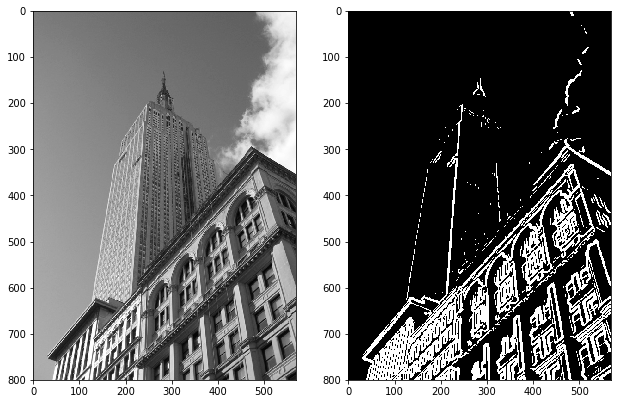

In [64]:
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(im,cmap=plt.cm.gray)
plt.subplot(1,3,2)
# print(im.shape)
imdx=np.zeros(im.shape[:2])
imdy=imdx.copy()
# gim=filters.gaussian_filter(im,5)
# use gaussian derivative filters...
filters.gaussian_filter(im,(2,2),(0,1),imdx)
filters.gaussian_filter(im,(2,2),(1,0),imdy)
# filters.sobel(gim,1,imdx)
# filters.sobel(gim,0,imdy)
immagnitude=np.sqrt(imdx**2+imdy**2)
# print(imdx.shape)
# binarize...
# print(immagnitude.max(),immagnitude.min())
# immagnitude=cv2.Canny(im,30,30)
der_thresh=8
immagnitude[immagnitude<der_thresh]=0
immagnitude[immagnitude>=der_thresh]=1
immagnitude=immagnitude.astype('bool')
plt.imshow(immagnitude,cmap=plt.cm.gray)
plt.show()

In [139]:
det_lines1=ppht(mask=immagnitude,rho=1,theta=1,thresh=40,maxgap=4,minlength=150,max_num=1e10)

In [140]:
det_lines2=cv2.HoughLinesP(immagnitude.astype('uint8'),1,np.pi/180,40,np.array([]),150,4)[:,0,:]

In [143]:
print(det_lines1,det_lines2)

[(52, 799, 215, 636), (86, 799, 247, 638), (64, 799, 282, 581), (54, 799, 204, 649), (81, 799, 247, 633), (220, 553, 236, 320), (213, 617, 234, 320), (214, 616, 235, 320), (127, 626, 170, 355), (78, 799, 256, 615), (66, 799, 225, 640), (85, 797, 247, 635), (211, 619, 223, 449), (53, 799, 215, 637)] [[ 57 799 437 391]
 [ 81 799 275 583]
 [ 59 799 374 461]
 [ 85 797 247 635]
 [ 91 799 246 644]
 [ 93 799 247 645]
 [ 78 798 257 599]
 [ 78 799 255 603]
 [208 687 234 320]
 [ 90 768 235 613]
 [ 86 799 247 638]
 [ 61 798 320 520]
 [215 614 236 320]
 [ 92 799 247 644]
 [127 626 172 344]
 [211 618 225 422]]


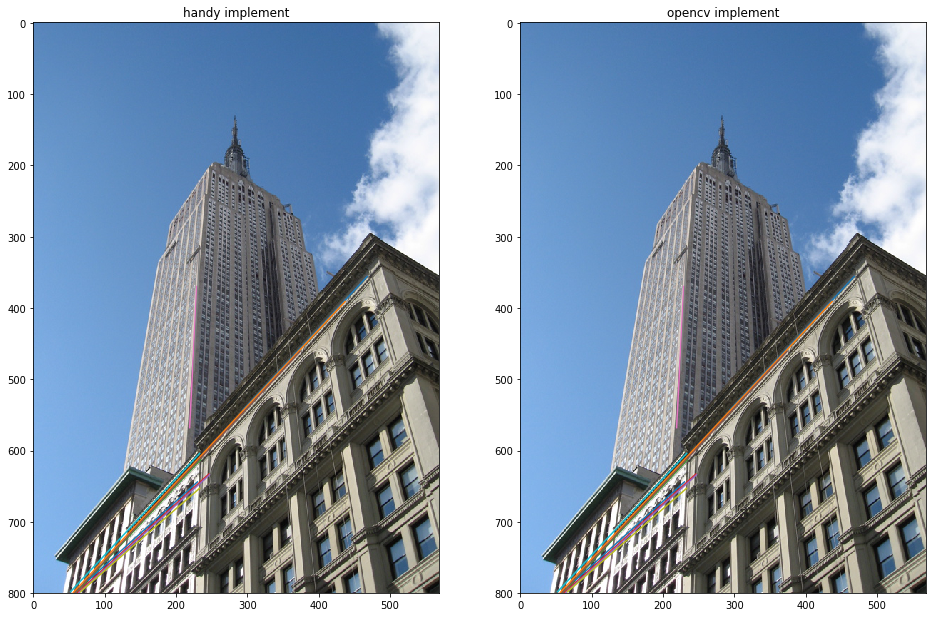

In [142]:
plt.figure(figsize=(16,16))
# x1y1x2y2
for k,det_line in enumerate([det_lines1,det_lines2]):
    plt.subplot(1,2,k+1)
    if k==0:
        plt.title('handy implement')
    else:
        plt.title('opencv implement')
    plt.imshow(np.array(Image.open('../data/empire.jpg')))
    for x1,y1,x2,y2 in det_lines:
        plt.plot([x1,x2],[y1,y2])

plt.show()

## (6) 物体大小分布 

In [144]:
from scipy.ndimage import measurements
from scipy.ndimage import morphology

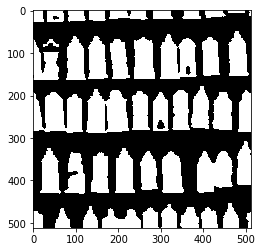

In [147]:
im=np.array(Image.open('../data/houses.png').convert('L'))
bim=1*(im<128)
plt.imshow(bim,cmap=plt.cm.gray)
plt.show()

In [148]:
im_label,num_label=measurements.label(bim)

45


In [154]:
print(num_label)

45


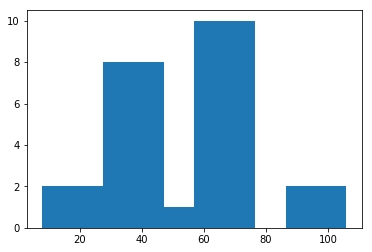

In [159]:
size_list=[]
for i in range(num_label):
    idx,idy=(im_label==(i+1)).nonzero()
    minx=idx.min()
    maxx=idx.max()
    miny=idy.min()
    maxy=idy.max()
    size_list+=[np.sqrt((maxx-minx)*(maxy-miny))]
plt.hist(size_list,bins=10)
plt.show()

## (7) 物体中心

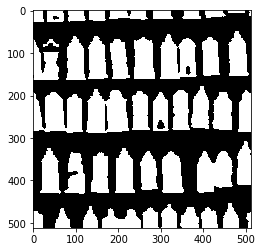

In [161]:
im=np.array(Image.open('../data/houses.png').convert('L'))
bim=1*(im<128)
plt.imshow(bim,cmap=plt.cm.gray)
plt.show()

In [165]:
bim=morphology.binary_opening(bim,np.ones((9,5)),iterations=2 )*1

In [174]:
im_label,num_label=measurements.label(bim)
centers=measurements.center_of_mass(bim,im_label,np.arange(1,num_label+1))
print(centers)

[(13.938253012048193, 11.048192771084338), (13.5, 40.0), (13.421511627906977, 65.03488372093024), (13.2002200220022, 100.99229922992299), (11.789924973204716, 150.7684887459807), (9.19741935483871, 200.17290322580646), (10.5, 247.0), (10.298305084745763, 302.76949152542375), (9.700272479564033, 371.3092643051771), (8.236276849642005, 417.3556085918854), (108.0603096984515, 480.9559902200489), (115.71497860199715, 319.5118402282454), (115.87245787332947, 150.62173155142358), (110.94373149062191, 416.67127344521225), (116.2481426448737, 259.84695393759284), (119.41905318527176, 99.86469900642899), (110.88239411970599, 362.72033601680084), (115.82761998041136, 201.56578517793014), (125.5650929899857, 8.819027181688126), (131.9031798766018, 41.30042714760323), (236.12592354641825, 393.3398650819145), (244.22826394789013, 147.70631549136223), (236.40137758296805, 346.7773951158422), (241.57542843350228, 196.5652908520396), (238.88728323699422, 251.58863198458573), (239.90762934814381, 445.0

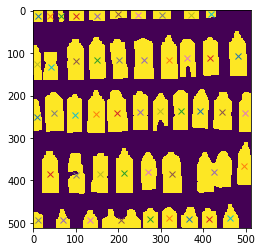

In [185]:
plt.imshow(bim)
for i,j in centers: # it's i,j not x,y
    plt.plot(j,i,'x')
plt.show()